# Clustering Algortihms

In Machine Learning, the types of Learning can broadly be classified into three types: 

1. Supervised Learning,  
2. Unsupervised Learning and   
3. Semi-supervised Learning.  

Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

## Table of Content
* Exploratory Data Analysis
* Clustering Analysis :

> Kmeans Algorithm

> Hierarchical Clustering

> Density Based Clustering (DBSCAN)

## Data
* CustomerID: Unique ID assigned to the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Annual Income (k): Annual Income of the customee
* Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature


In [12]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importing the dataset
data = pd.read_csv('E:\work\DataSets\Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Exploratory Data Analysis

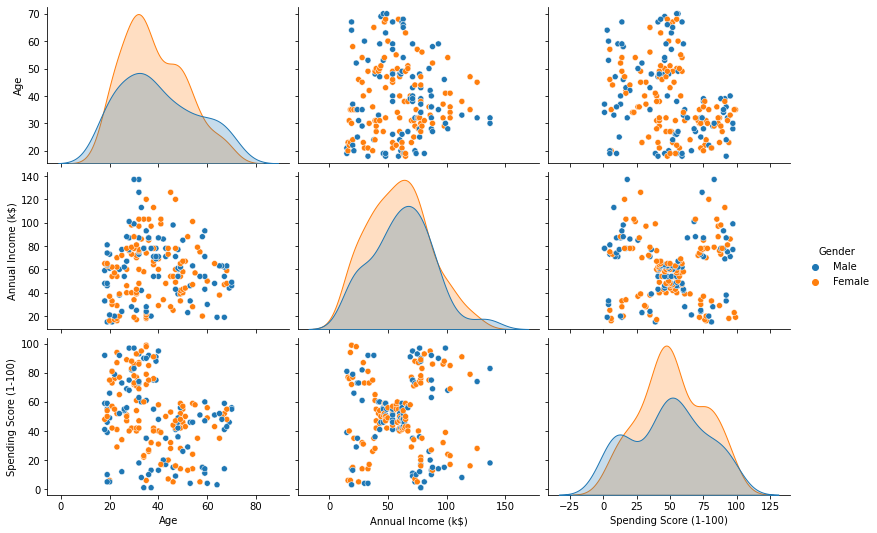

In [14]:
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

> From the above plot I see that gender has no direct relation to segmenting customers. I can drop it and move on with other features.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


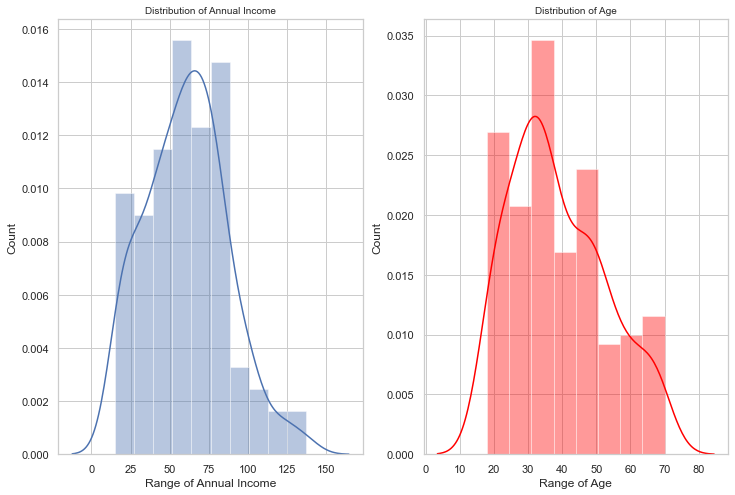

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 10)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 10)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Here, In the above Plots I see the Distribution pattern of Annual Income and Age, By looking at the plots, 

>> we can infer one thing that There are few people who earn more than 100 US Dollars.
>> Most of the people have an earning of around 50-75 US Dollars.
>> Also, we can say that the least Income is around 20 US Dollars.

> Taking inferences about the Customers.
>> The most regular customers for the Mall has age around 30-35 years of age.
>> Whereas the the senior citizens age group is the least frequent visitor in the Mall.
>> Youngsters are lesser in umber as compared to the Middle aged people.

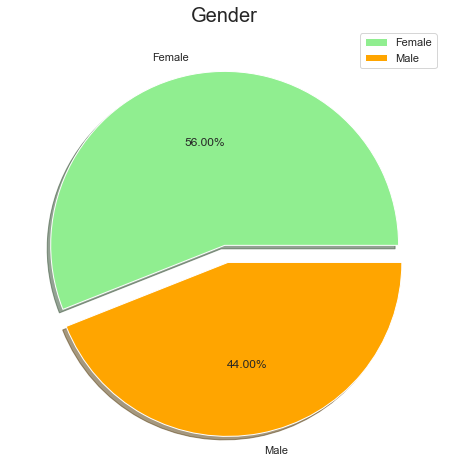

In [35]:
labels = ['Female', 'Male']
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(data['Gender'].value_counts(),colors=colors,labels=labels,explode=explode,shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> By looking at the above pie chart which explains about the distribution of Gender in the Mall
>> Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


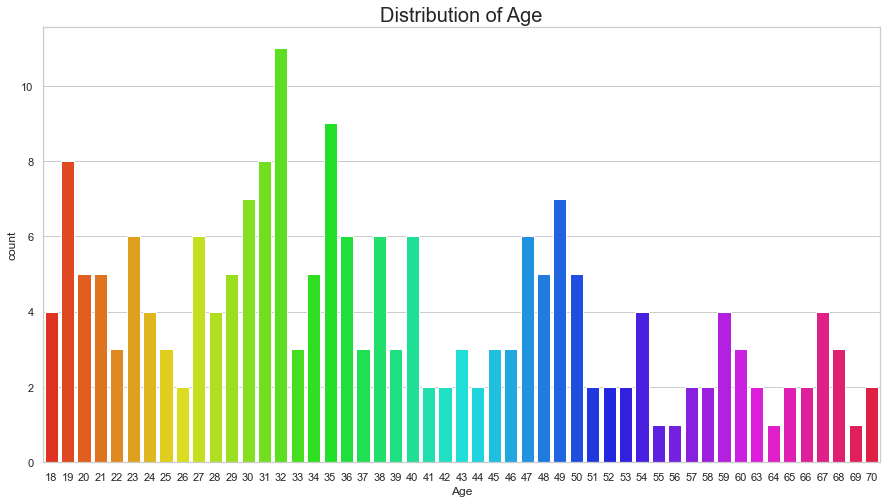

In [36]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.
>> By looking at the above graph-, It can be seen that the Ages 19,30,31,32,35 and 49  are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


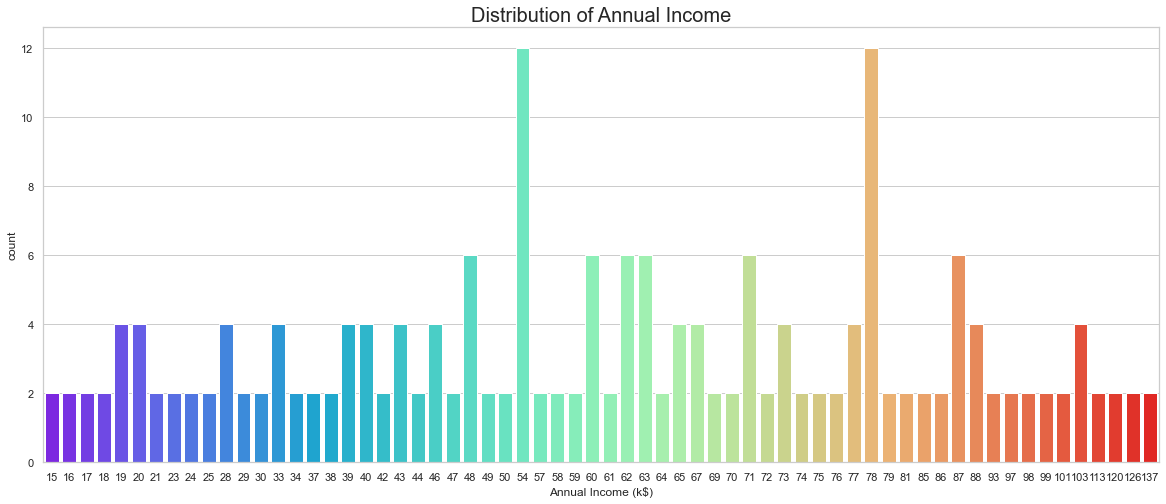

In [37]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

> The visitors have different range of incomes from 15k to 137k.High number of visitors have incomes around 54k and 76k 


C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


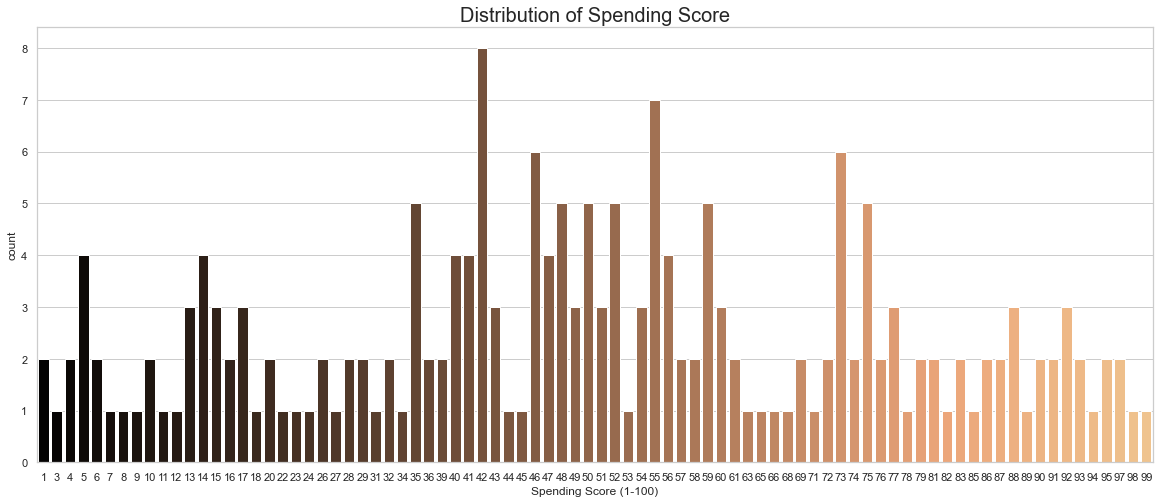

In [38]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.
>> On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
>> Interesting there are customers having 1 spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


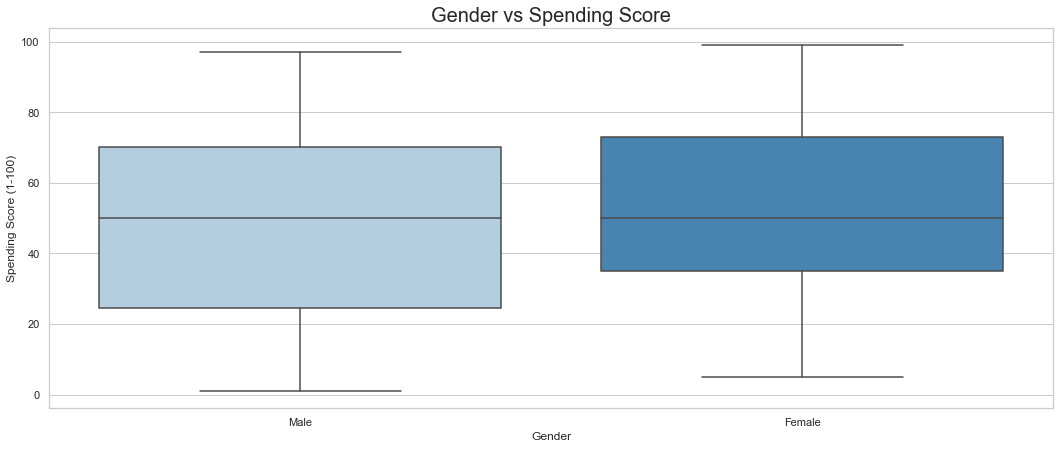

In [39]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

In [52]:
Male=(data.loc[data['Gender']=='Male','Spending Score (1-100)']).array
np.percentile(Male,[25,50,75])

array([24.5, 50. , 70. ])

In [54]:
Female=(data.loc[data['Gender']=='Female','Spending Score (1-100)']).array
np.percentile(Female,[25,50,75])

array([35., 50., 73.])

> Bi-variate Analysis between Gender and Spending Score, 
>> It is clearly visible that the most of the males have a Spending Score of around 25 to 70  whereas the Females have a spending score of around 35 to 75.It shows Females have extended range for shopping 

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


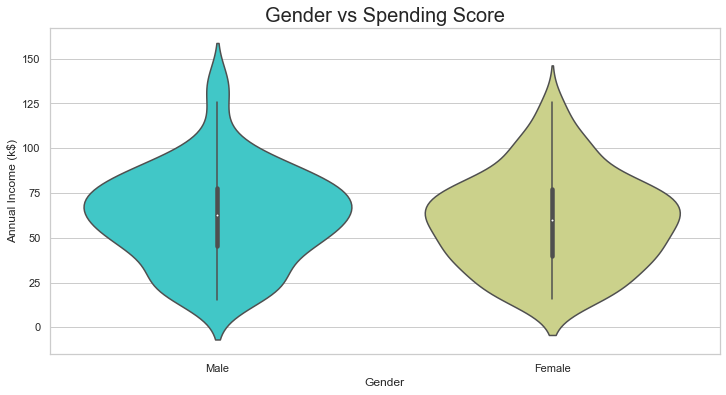

In [50]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

In [53]:
Male=(data.loc[data['Gender']=='Male','Annual Income (k$)']).array
np.percentile(Male,[25,50,75])

array([45.5, 62.5, 78. ])

In [55]:
Female=(data.loc[data['Gender']=='Female','Annual Income (k$)']).array
np.percentile(Female,[25,50,75])

array([39.75, 60.  , 77.25])

> As seen, median of Income for two both gender is similar between 60k to 63k, but distribution of incomes for Female is wider

## Clustering Analysis

### Kmeans Algorithm

In [88]:
x = data.iloc[:, [3, 4]]

# let's check the shape of x
print(x.shape)


(200, 2)


**The Elbow Method to find the Nunber of Optimal Clusters**

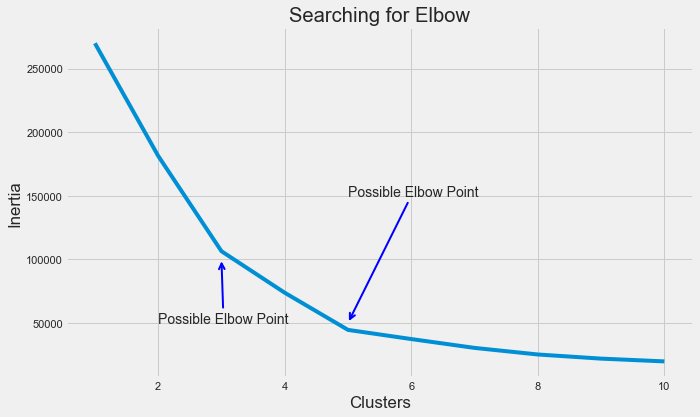

In [87]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 100000), xytext=(2, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 50000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

>Elbow method tells to select the cluster when there is a significant change in inertia. As seen from the graph, we can say this may be either 3 or 5.S we visualise for both results in graph and then will decide.


**Visualizaing the Clusters**

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


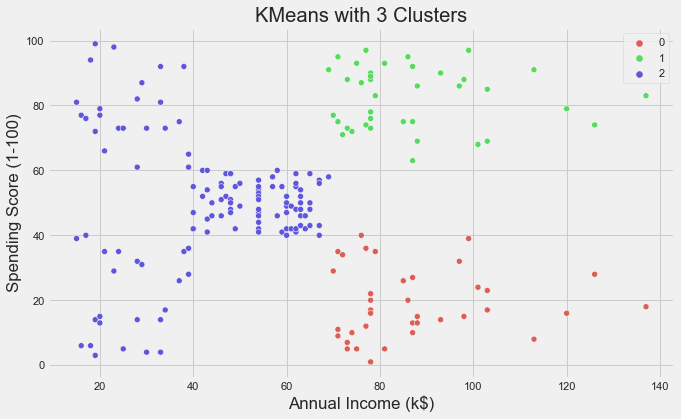

In [95]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(x)

Labels = km3.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=Labels, 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


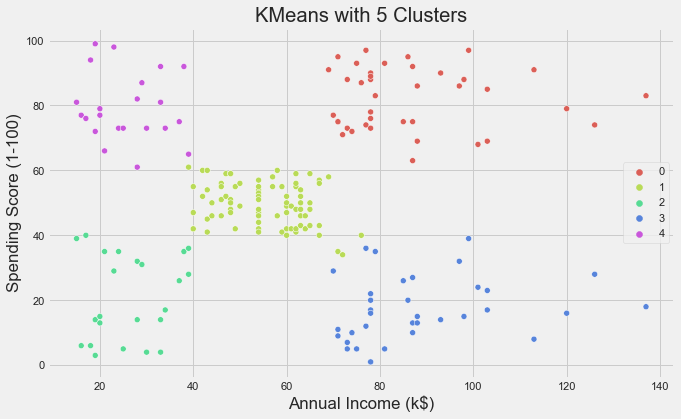

In [97]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(x)

Labels = km5.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=Labels, 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

>By judging from the plots I could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice. 

>>We can analyze our 5 clusters in detail now:

>>- `Label 0` is low income and low spending
>>- `Label 1` is high income and high spending
>>- `Label 2` is mid income and mid spending
>>- `Label 3` is high income and low spending
>>- `Label 4` is low income and high spending


## Hierarchical Clustering

### Agglomerative
We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Agglomerative is the bottom up approach which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended that try everything with 'average' as well </li>
    </ul>
</ul>

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


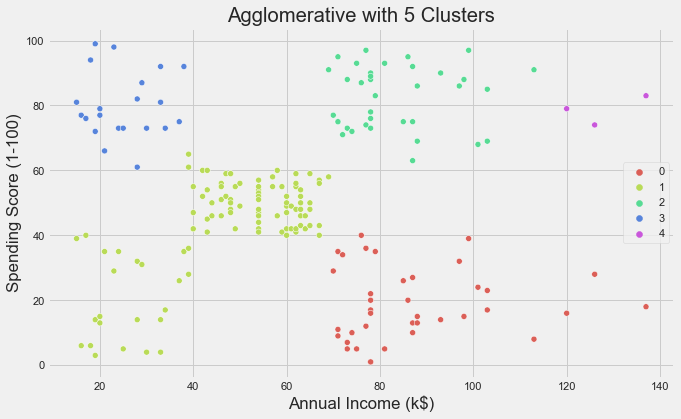

In [100]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(x)

Labels = agglom.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=Labels, palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()


### Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
We can use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. 
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br>

In [101]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(x, x)
print(dist)

[[  0.          42.          33.01514804 ... 116.38728453 123.79418403
  129.69194269]
 [ 42.           0.          75.00666637 ... 111.22050171 137.3062271
  122.01639234]
 [ 33.01514804  75.00666637   0.         ... 129.32130528 121.59358536
  143.42245291]
 ...
 [116.38728453 111.22050171 129.32130528 ...   0.          57.07013229
   14.2126704 ]
 [123.79418403 137.3062271  121.59358536 ...  57.07013229   0.
   65.        ]
 [129.69194269 122.01639234 143.42245291 ...  14.2126704   65.
    0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul>

In [102]:
Z = hierarchy.linkage(dist, 'complete')

<ipython-input-102-4acca9972bb1>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

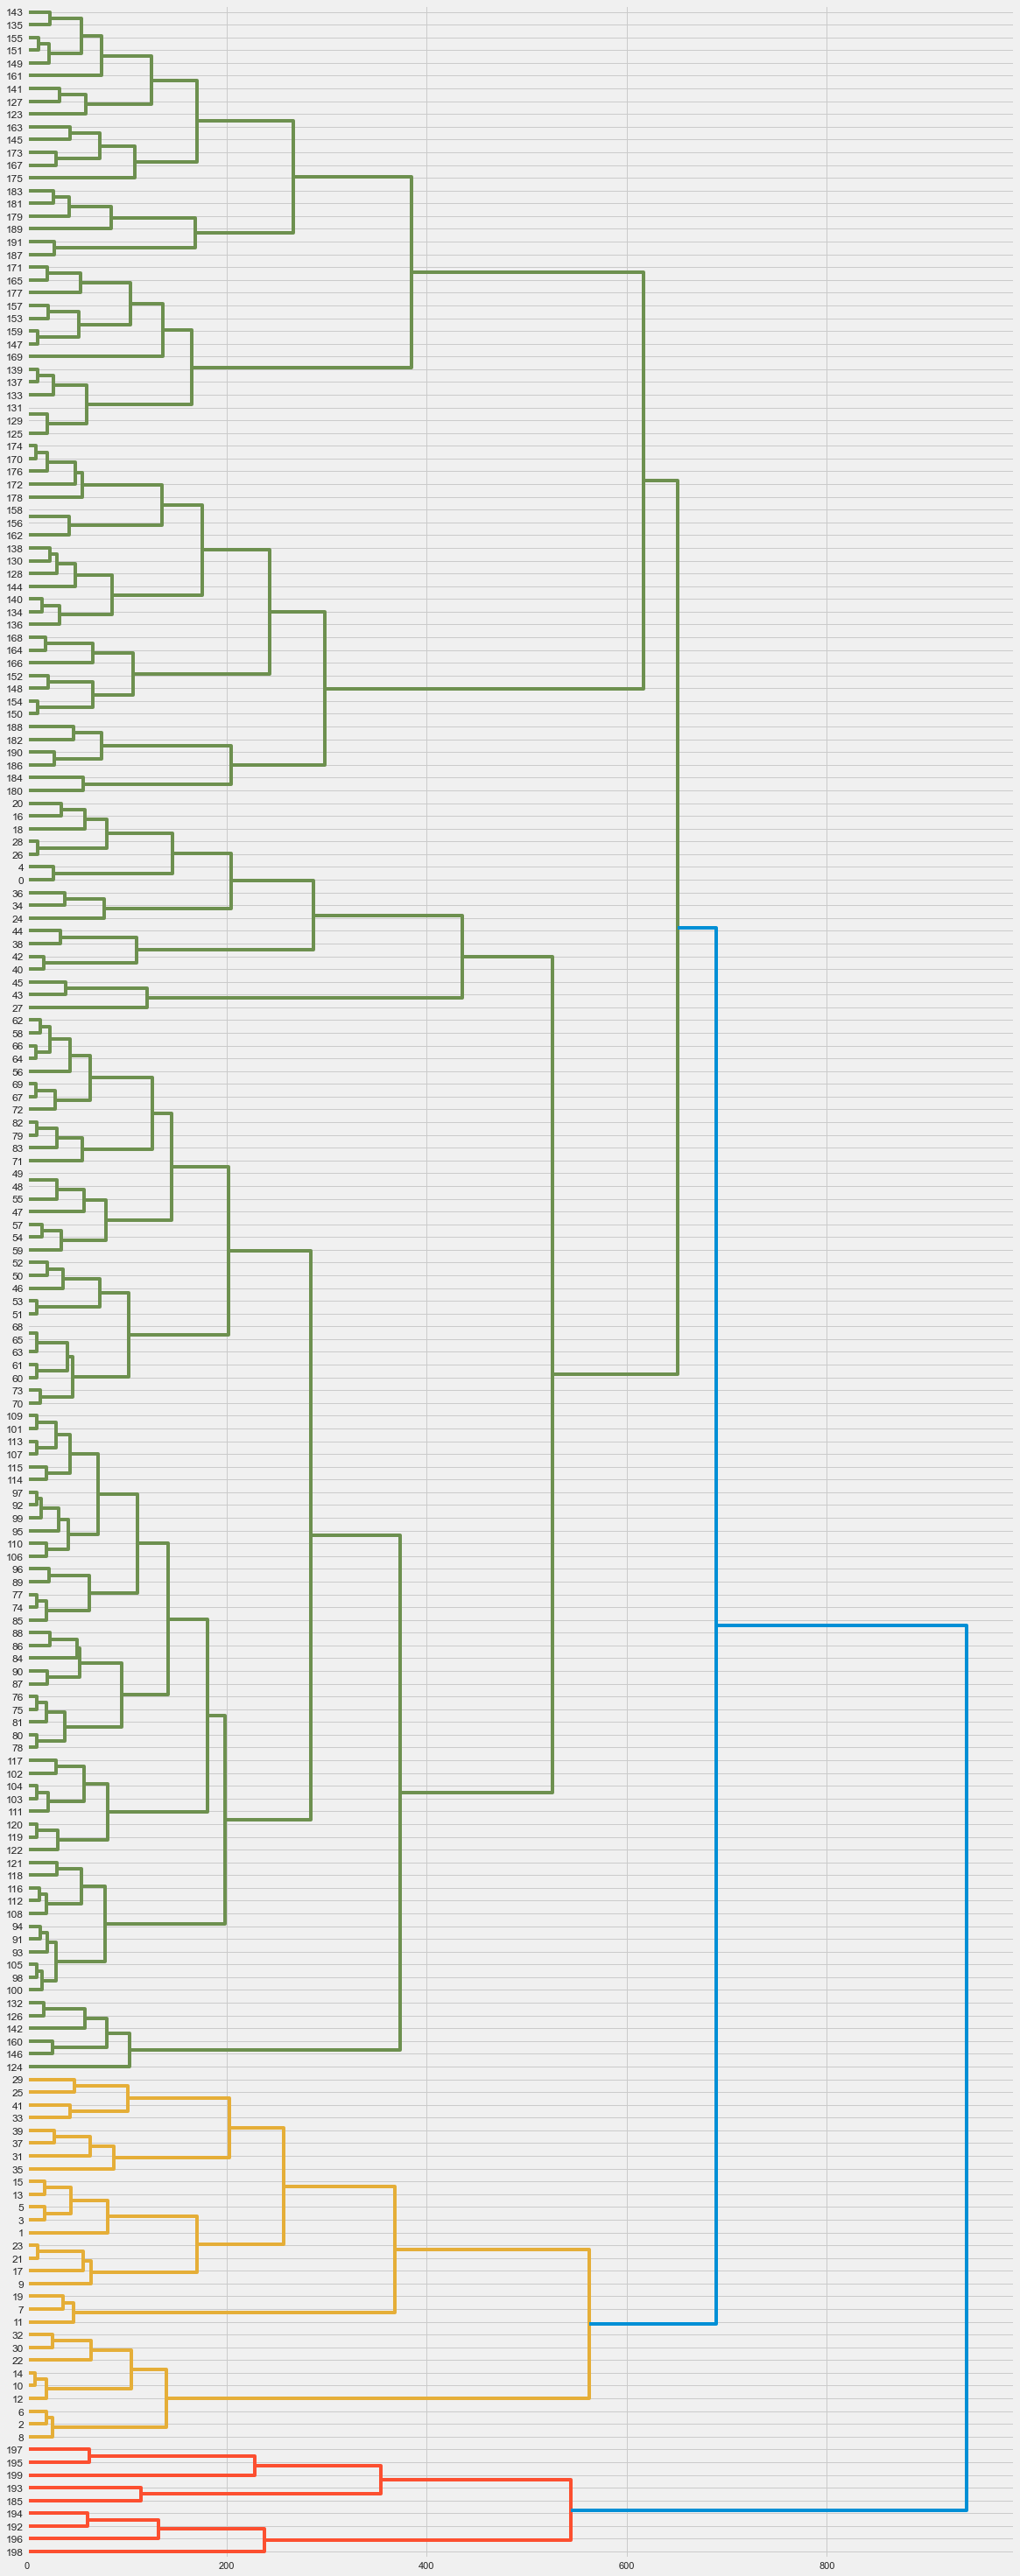

In [103]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

We used __complete__ linkage for our case, let's change it to __average__ linkage to see how the dendogram changes.

<ipython-input-104-54ae435f7a9c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


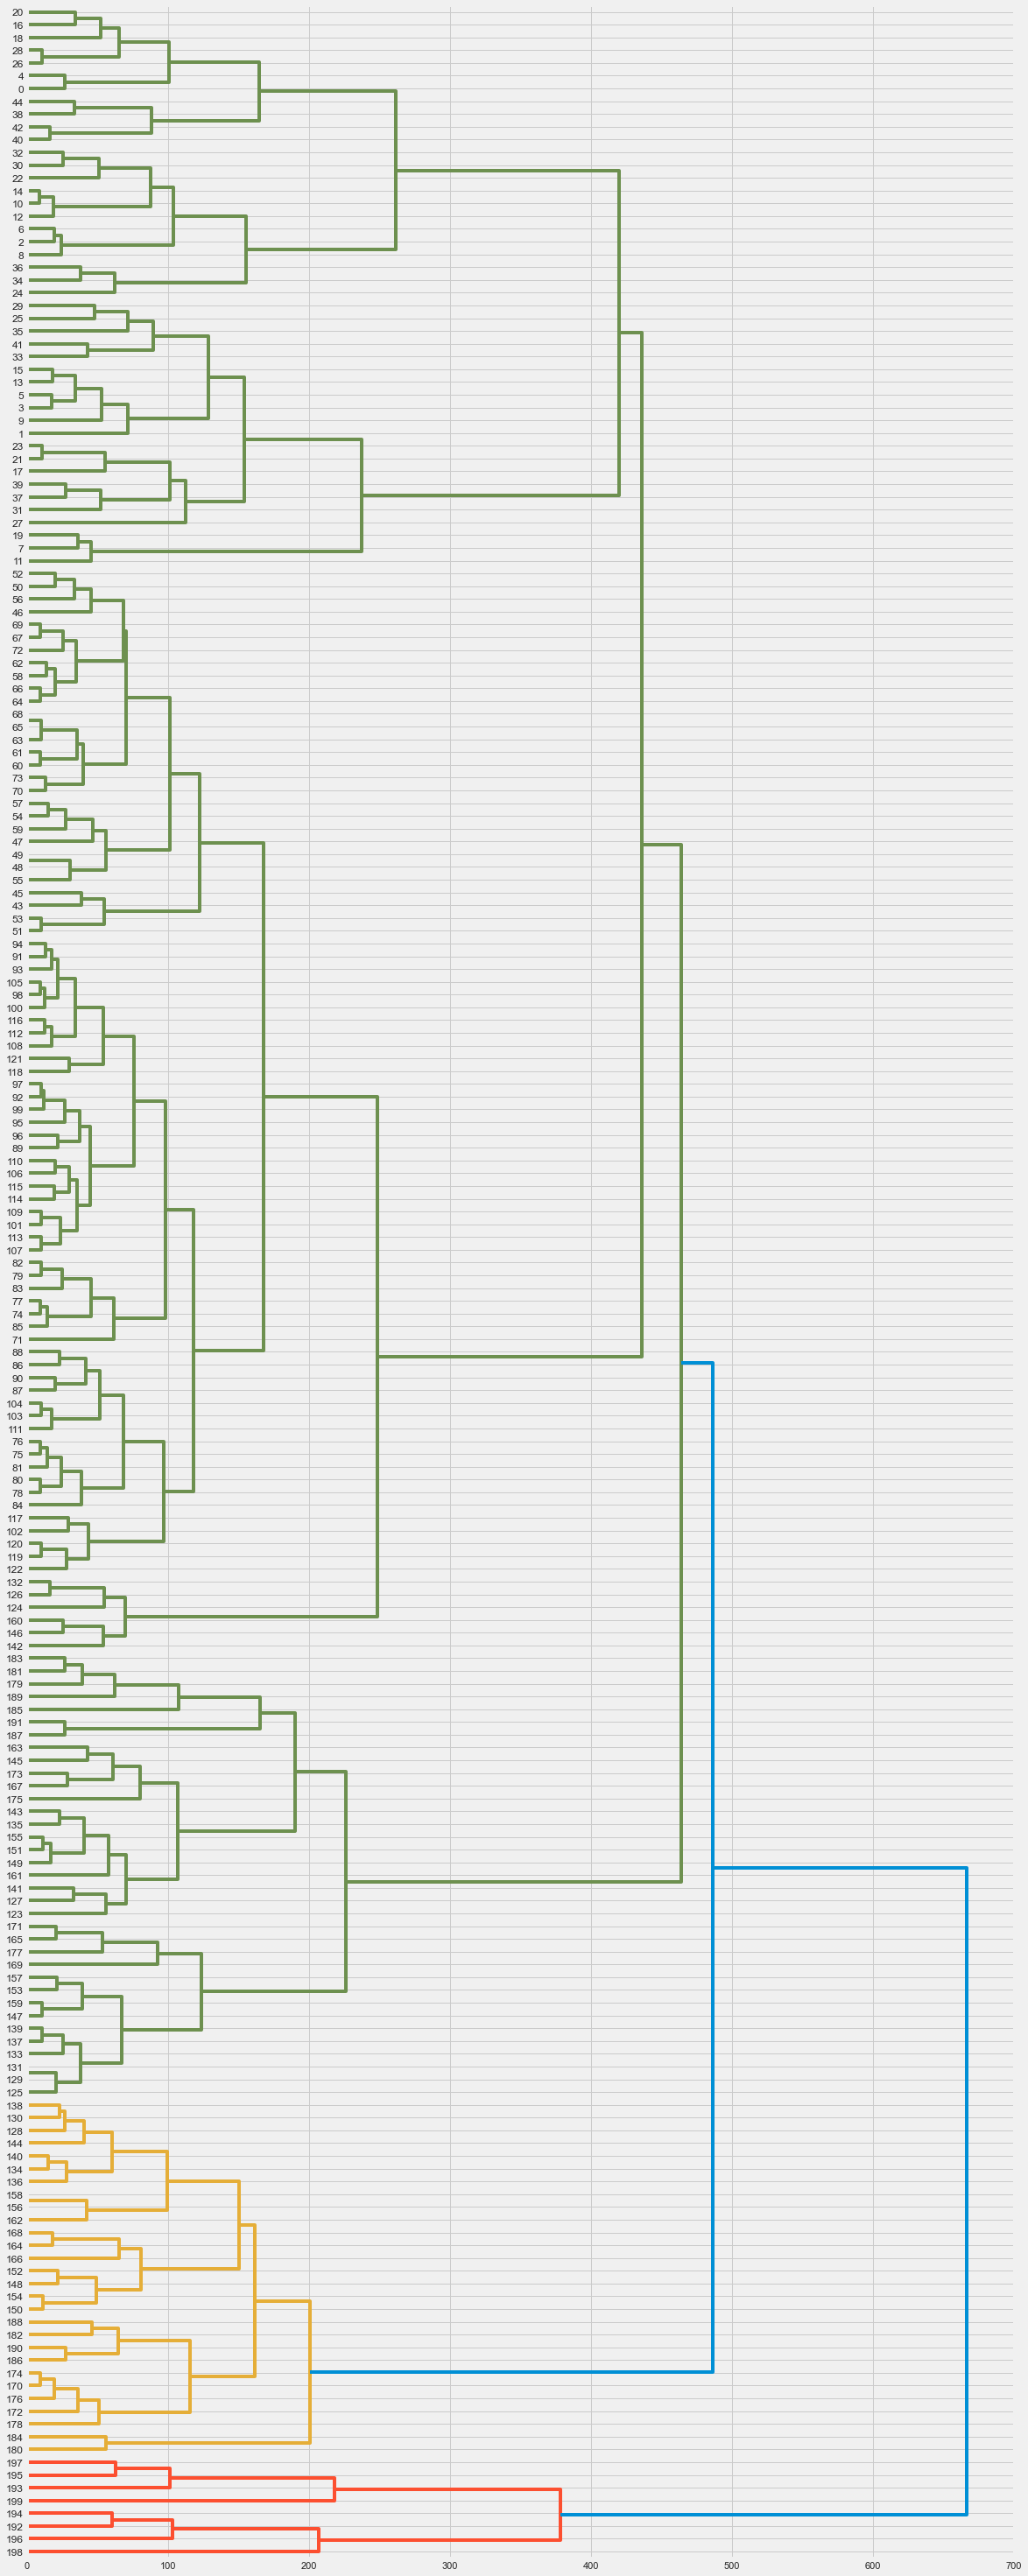

In [104]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Density Based Clustering (DBSCAN)

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

### Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
__Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
__minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


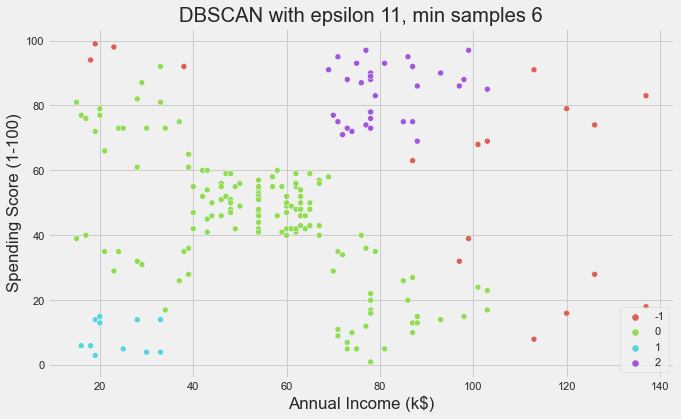

In [106]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(x)

Labels = db.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=Labels, 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.